**Importing Libraries**

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Data**

In [60]:
data=pd.read_csv("/content/StudentsPerformance.csv")

**Dataset Details**

In [61]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [62]:
data.shape

(1000, 8)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [64]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Handling Missing Values**

In [65]:
data.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


**Checking Unnecessary Columns and drop them**

In [66]:
data.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


In [67]:
data.drop(columns=['race/ethnicity'],inplace=True)

In [68]:
data.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,bachelor's degree,standard,none,72,72,74
1,female,some college,standard,completed,69,90,88
2,female,master's degree,standard,none,90,95,93
3,male,associate's degree,free/reduced,none,47,57,44
4,male,some college,standard,none,76,78,75


**Encoding Categorical Columns**------*for better accuracy*

In [69]:
for col in ['gender', 'parental level of education', 'test preparation course']:
    if col not in data.columns:
        print(f"Column '{col}' not found in DataFrame")


In [70]:
print(data.columns.tolist())


['gender', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


In [71]:
#One Hot Encoding----as we dont have any clear order
data = pd.get_dummies(data, columns=['gender', 'parental level of education', 'lunch', 'test preparation course'], drop_first=True)



**Normalize the relevant data columns**------*for better fairness, smarter convergence*

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_cols=['math score','reading score','writing score']
data[num_cols] = scaler.fit_transform(data[num_cols])

**Exploratory Data Analysis**

In [73]:
print(data.duplicated().sum)

<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool>


**Correlation Heatmap**

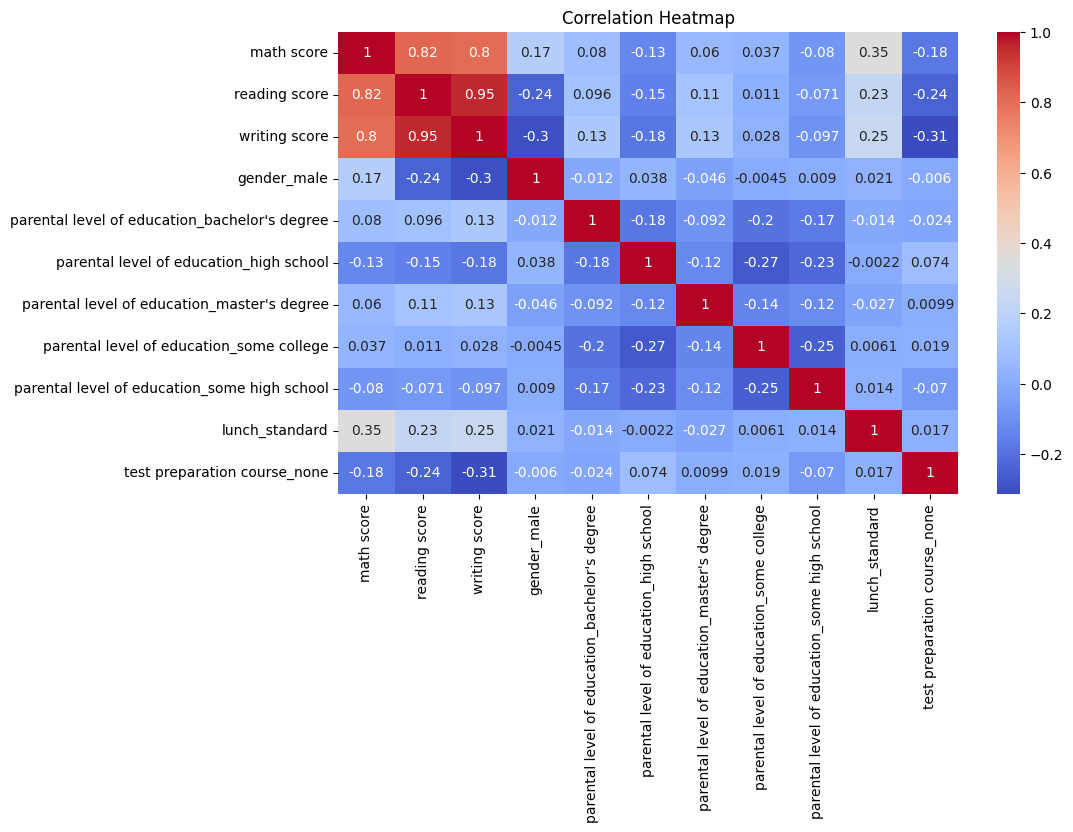

In [74]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Distribution of math score**

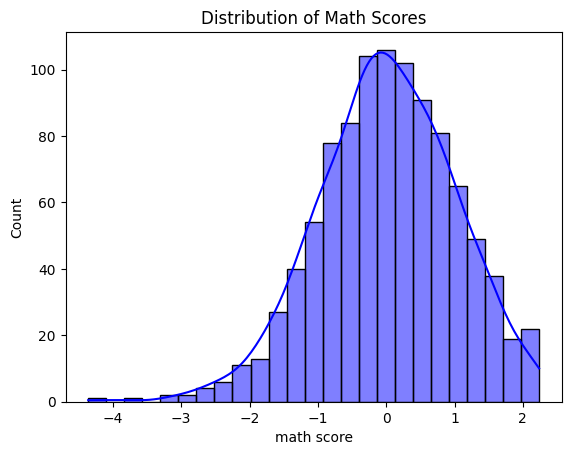

In [75]:
sns.histplot(data['math score'], kde=True, color='blue')
plt.title("Distribution of Math Scores")
plt.show()

*Box plot-----performance vs studytime *

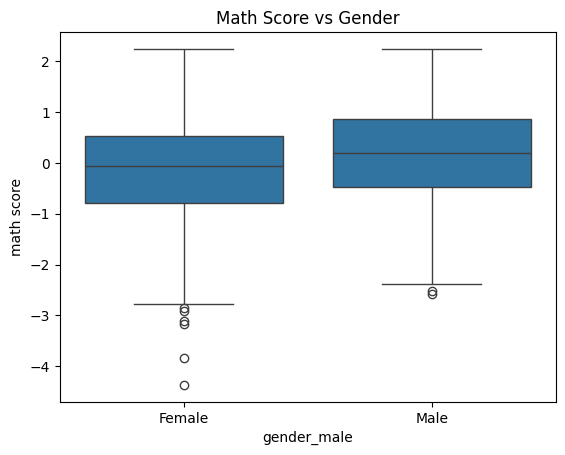

In [76]:
sns.boxplot(x='gender_male', y='math score', data=data)
plt.title('Math Score vs Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

In [77]:

col = 'math score'
Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]


*Impact of parent Education on Average Score *

/tmp/ipython-input-1578970103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['avg_score'] = (data['math score'] + data['reading score'] + data['writing score']) / 3


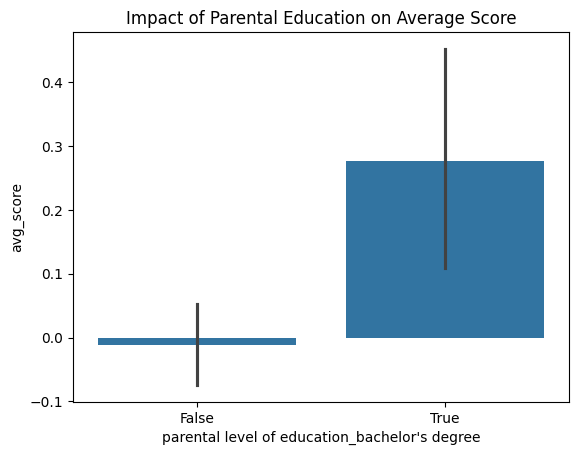

In [78]:
data['avg_score'] = (data['math score'] + data['reading score'] + data['writing score']) / 3

sns.barplot(x='parental level of education_bachelor\'s degree', y='avg_score', data=data)
plt.title('Impact of Parental Education on Average Score')
plt.show()


**Pair Plot – See Patterns Across All Features**

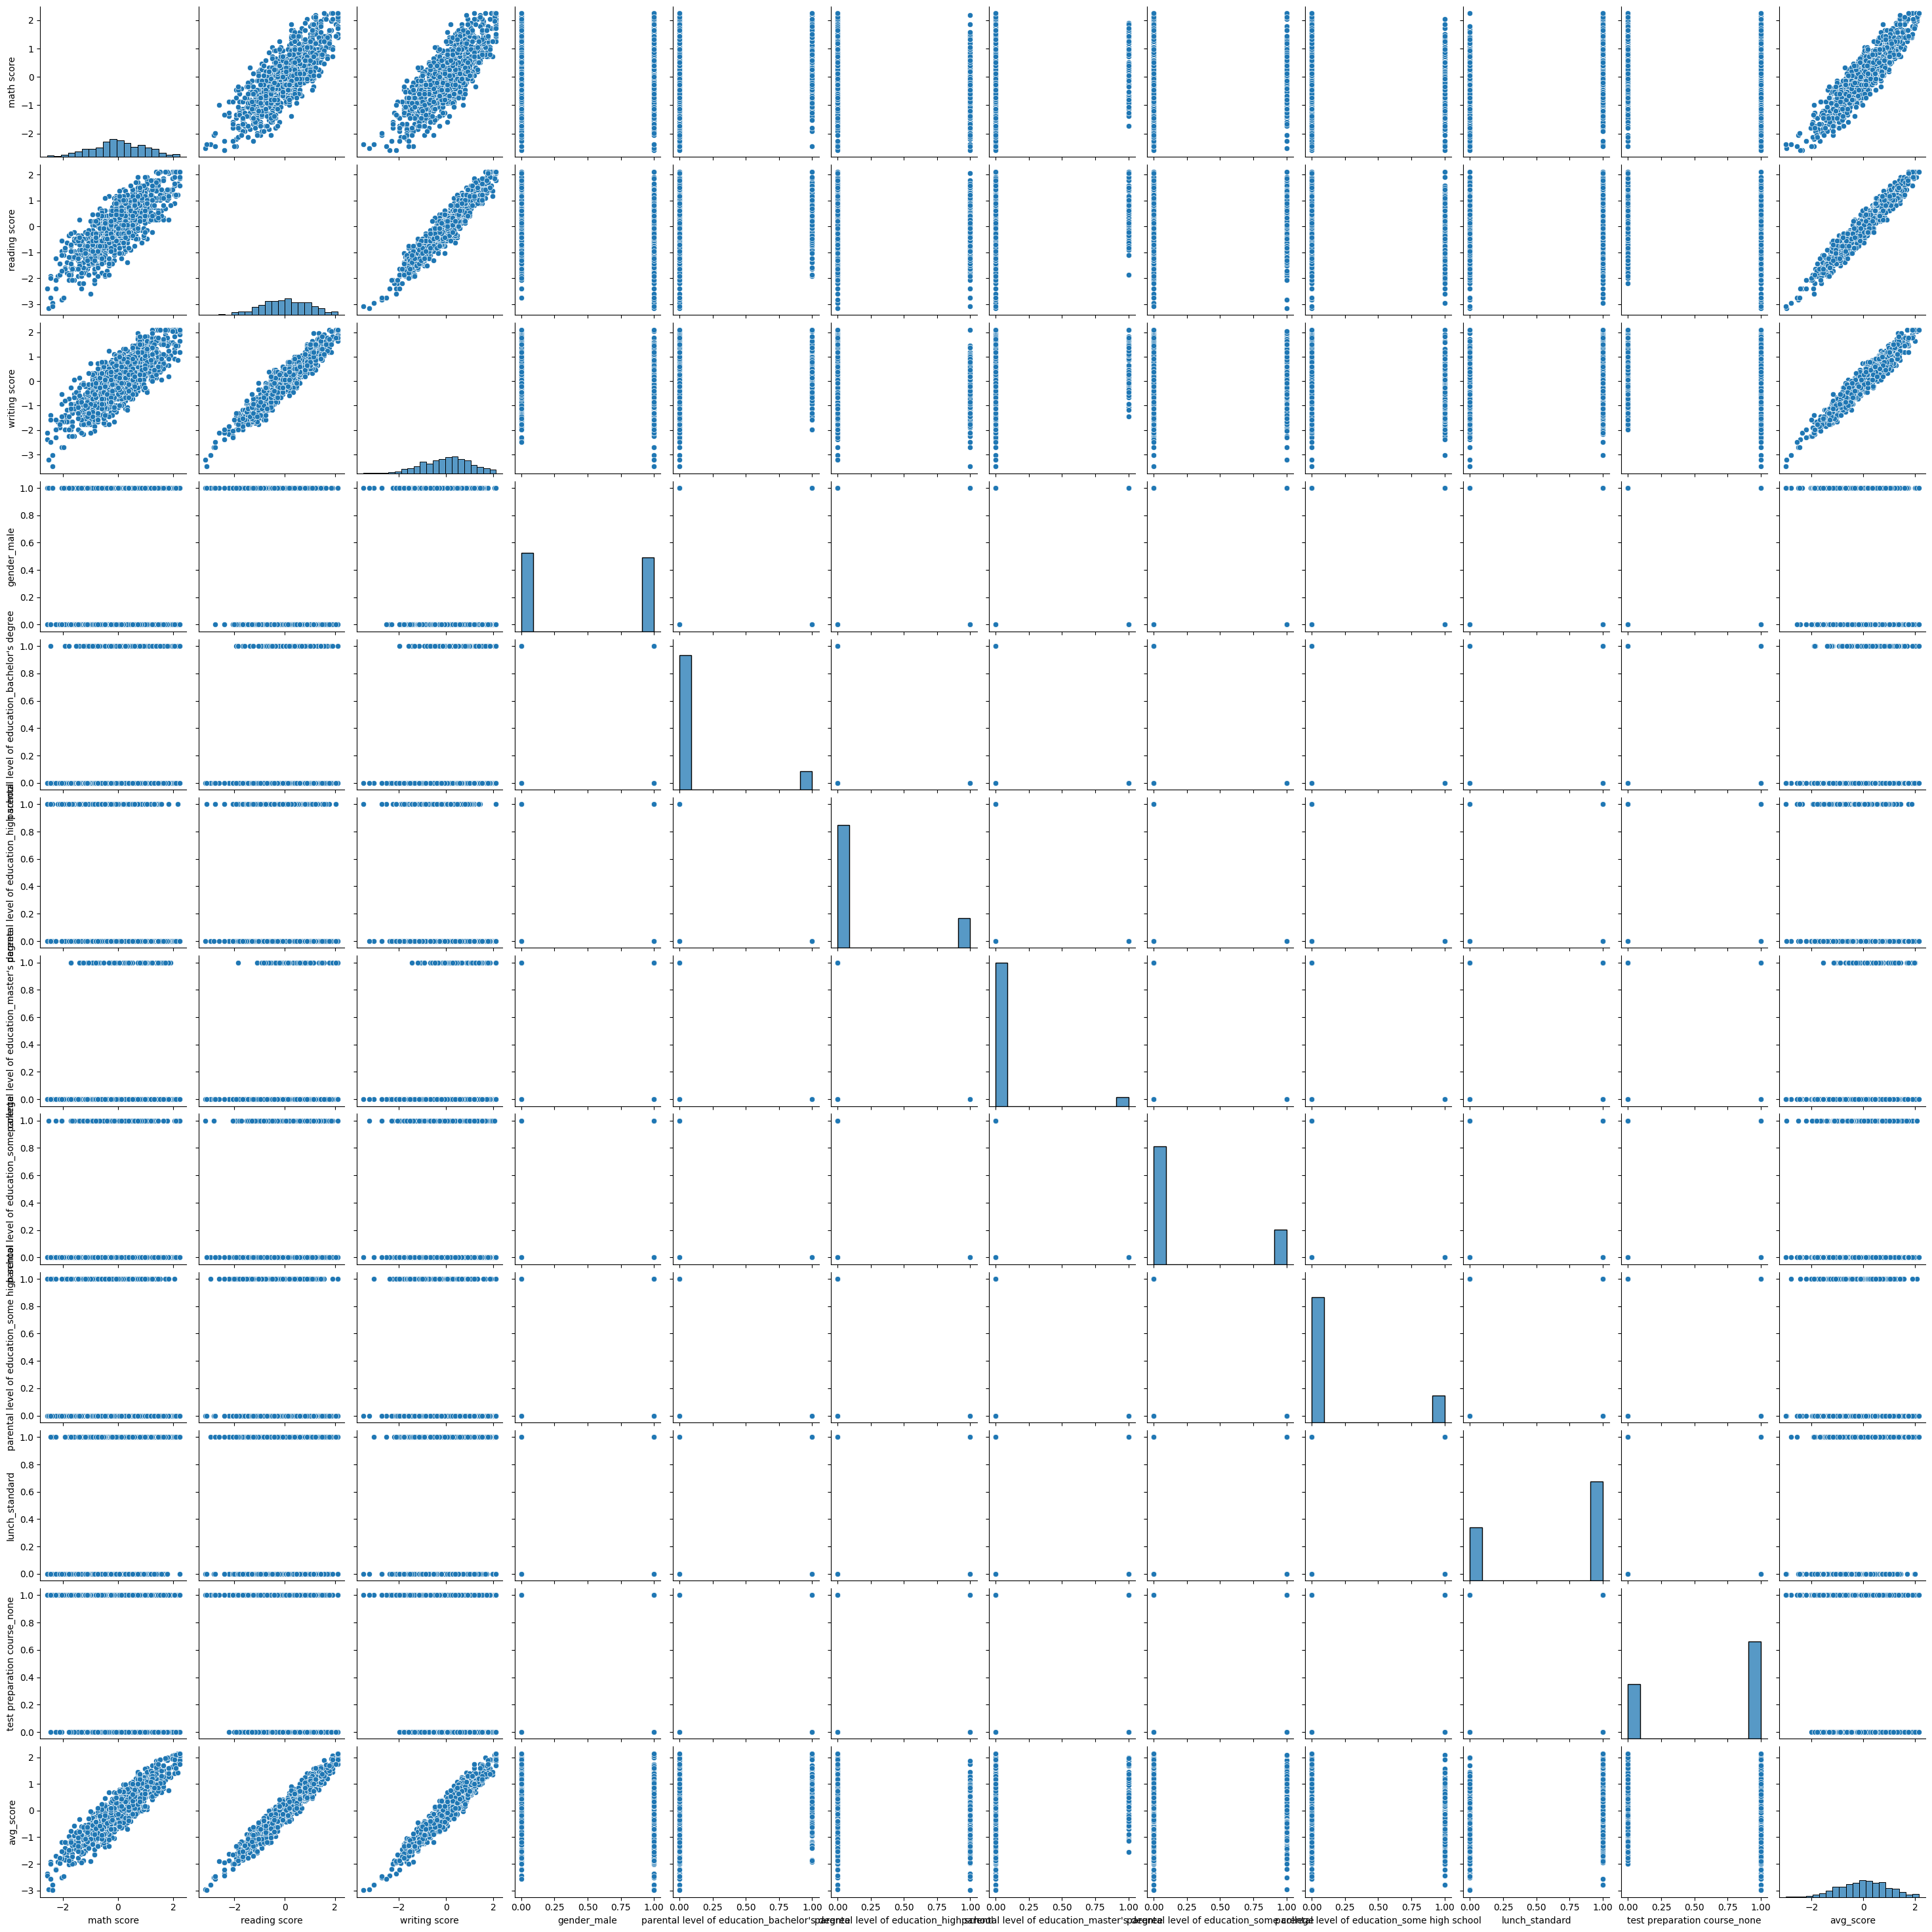

In [79]:
sns.pairplot(data)


Outlier Detecction----Box Plot

<Axes: ylabel='math score'>

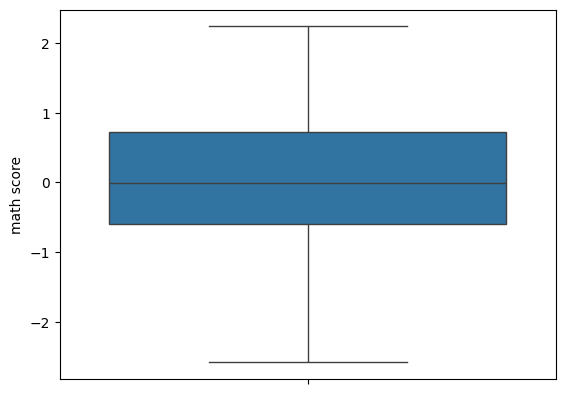

In [80]:
sns.boxplot(data['math score'])


<Axes: ylabel='reading score'>

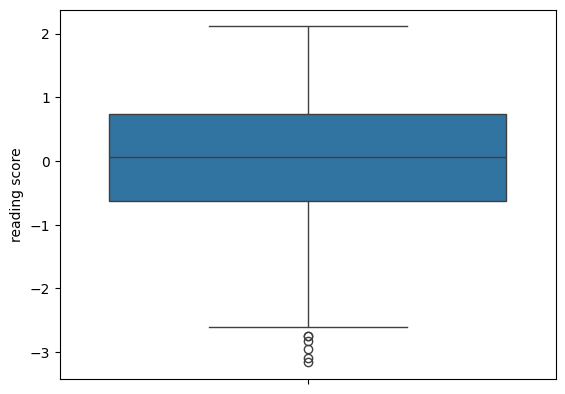

In [81]:
sns.boxplot(data['reading score'])

In [82]:
col = 'reading score'
Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]


<Axes: ylabel='reading score'>

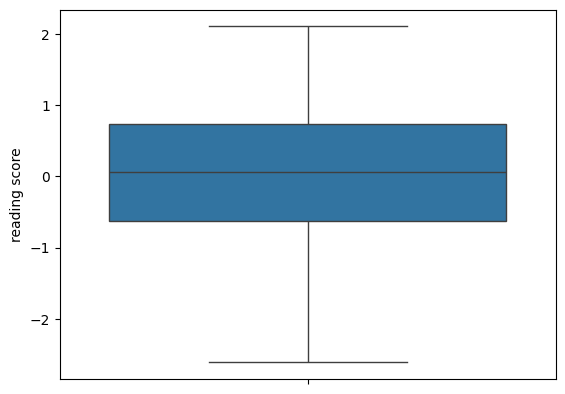

In [83]:
sns.boxplot(data['reading score'])

<Axes: ylabel='writing score'>

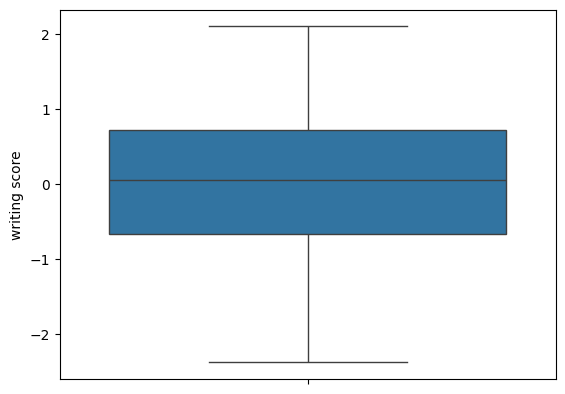

In [84]:
sns.boxplot(data['writing score'])

*** Average Score by Test Prep Course***

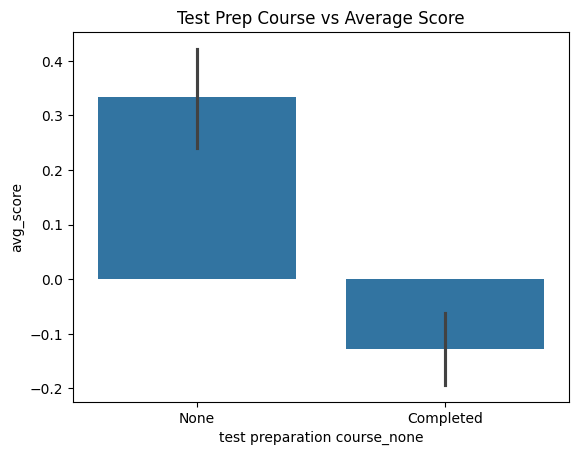

In [85]:
sns.barplot(x='test preparation course_none', y='avg_score', data=data)
plt.title('Test Prep Course vs Average Score')
plt.xticks([0, 1], ['None', 'Completed'])
plt.show()


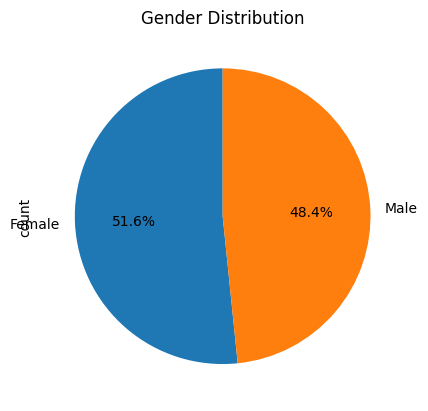

In [86]:
data['gender_male'].value_counts().plot.pie(labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()


**Model Training & Model Evaluation**

In [87]:
# Import libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [88]:
#Feature & Target split
X = data.drop('avg_score', axis=1)   # Features
y = data['avg_score']                # Target

In [89]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model Initialization
model = LinearRegression()

#Train the model
model.fit(X_train, y_train)

LinearRegression()

In [90]:
#Predictions
y_pred = model.predict(X_test)

#Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(" Model Evaluation:")
print(f" MAE:  {mae:.2f}")
print(f" MSE:  {mse:.2f}")
print(f" RMSE: {rmse:.2f}")
print(f" R2 Score: {r2:.2f}")

 Model Evaluation:
 MAE:  0.00
 MSE:  0.00
 RMSE: 0.00
 R2 Score: 1.00


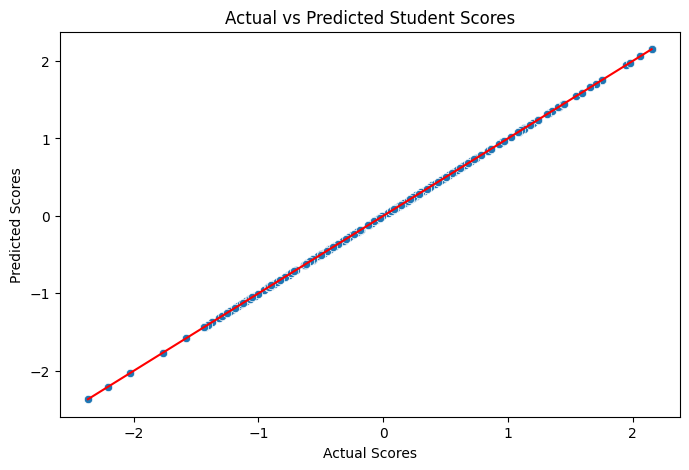

In [91]:
#Plot Actual vs Predicted
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Student Scores")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
plt.show()


**XGBOOST-----for smart and fast prediction**

In [92]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Initialize the model
xgb_model = XGBRegressor(random_state=42)

# 3. Train the model
xgb_model.fit(X_train, y_train)

# 4. Predict on test data
y_pred = xgb_model.predict(X_test)

# 5. Evaluate performance
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost Model Performance:")
print("RMSE:", round(rmse, 2))
print("R² Score:", round(r2, 2))


XGBoost Model Performance:
RMSE: 0.0
R² Score: 1.0


**Hypertunning -----GridSearchCV**

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# 1. Define the base model
rf = RandomForestRegressor(random_state=42)

# 2. Define parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 3. Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,         # 5-fold cross-validation
                           n_jobs=-1,    # use all processors
                           verbose=2,
                           scoring='r2')

# 4. Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# 5. Print best parameters and best score
print("Best Hyperparameters:")
print(grid_search.best_params_)
print("\n Best R² Score on training data:")
print(grid_search.best_score_)

# 6. Evaluate on test data
best_model = grid_search.best_estimator_
test_preds = best_model.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error
print("\n Test R² Score:", r2_score(y_test, test_preds))
print(" Test MAE:", mean_absolute_error(y_test, test_preds))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

 Best R² Score on training data:
0.9972494906757092

 Test R² Score: 0.9970911609245446
 Test MAE: 0.030171834149776425


**Feature Importance**

1. Linear Regression----Extract and Visualize coefficients

/tmp/ipython-input-971920959.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='coolwarm')


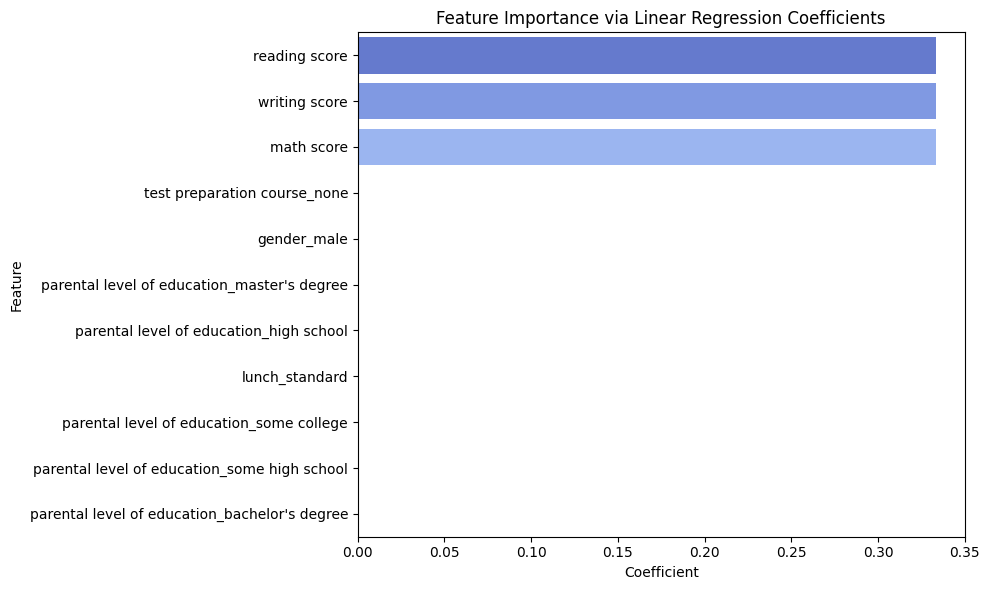

In [94]:
coefficients = model.coef_
features = X_train.columns

coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plot top positive and negative
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='coolwarm')
plt.title('Feature Importance via Linear Regression Coefficients')
plt.tight_layout()
plt.show()

2. XGBOOST

/tmp/ipython-input-2556908252.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

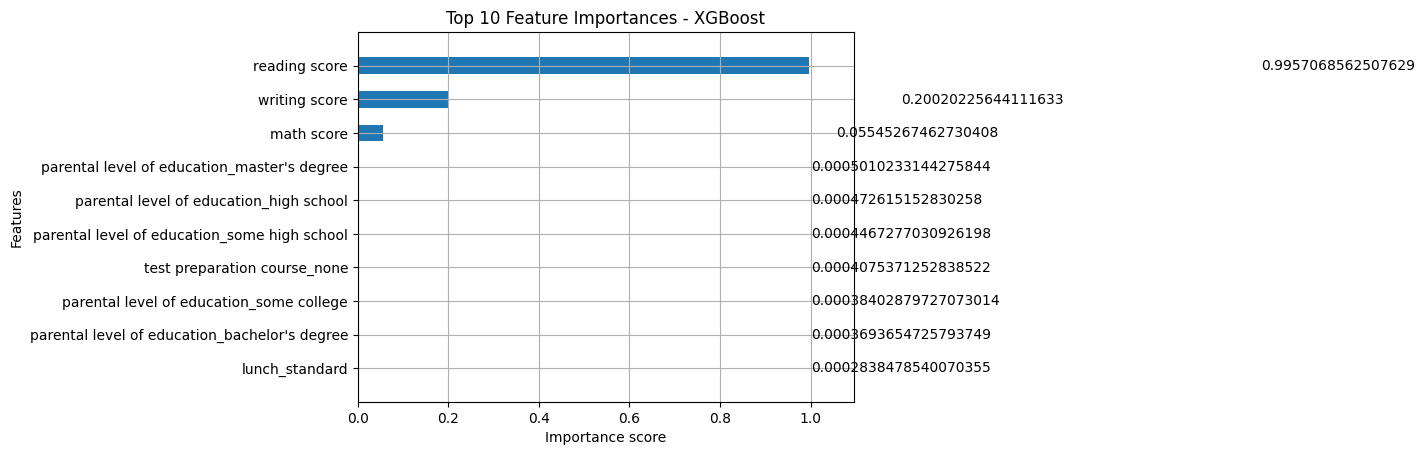

In [95]:
import xgboost as xgb
from xgboost import plot_importance


plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=10, importance_type='gain', height=0.5)
plt.title('Top 10 Feature Importances - XGBoost')
plt.tight_layout()
plt.show()


**Final Visualizations**

1. **Actual vs predicted performance**

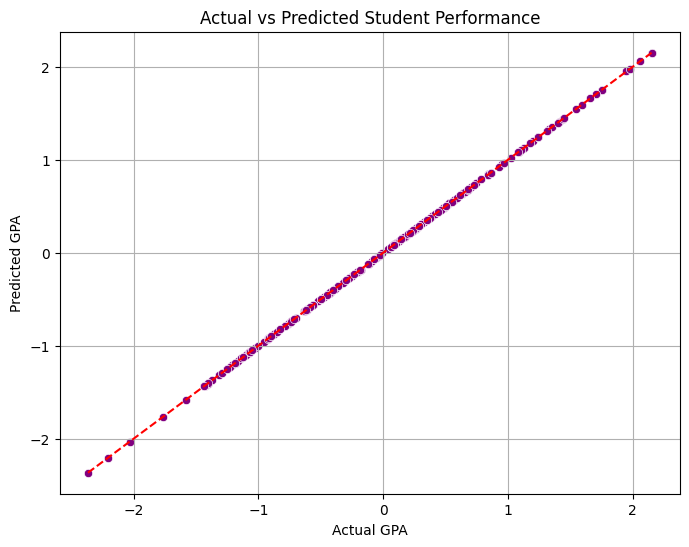

In [96]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.title('Actual vs Predicted Student Performance')
plt.grid(True)
plt.show()


**Case Study**

In [108]:
import pandas as pd

sample_student = pd.DataFrame({
    'StudyHours': [3.5,4,6,7],
    'Attendance': [82,75,89,90],
    'PreviousGPA': [7.2,8.1,7,9.0],
    'SleepDuration': [5.5,7,8,6],
    'ScreenTime': [4,3,5,6],
    'ExtraCurricular': [1,1,0,1]  # Assuming 1 = Yes
})

sample_student

,StudyHours,Attendance,PreviousGPA,SleepDuration,ScreenTime,ExtraCurricular
0,3.5,82,7.2,5.5,4,1
1,4.0,75,8.1,7.0,3,1
2,6.0,89,7.0,8.0,5,0
3,7.0,90,9.0,6.0,6,1


In [116]:

# Step 1: Define features (X) and target (y)
X = full_data.drop('FinalGPA', axis=1)
y = full_data['FinalGPA']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train model
model = LinearRegression()
model.fit(X_train, y_train)  # ✅ This is correct now

# Step 4: Make predictions on new data (sample students)
sample_student = pd.DataFrame({
    'StudyHours': [3.5, 4, 6, 7],
    'Attendance': [82, 75, 89, 90],
    'PreviousGPA': [7.2, 8.1, 7, 9.0],
    'SleepDuration': [5.5, 7, 8, 6],
    'ScreenTime': [4, 3, 5, 6],
    'ExtraCurricular': [1, 1, 0, 1]
})

predicted_score = model.predict(sample_student)

# Print predictions
for i, score in enumerate(predicted_score):
    print(f"Student {i+1} - Predicted Final GPA: {round(score, 2)}")


Student 1 - Predicted Final GPA: 7.5
Student 2 - Predicted Final GPA: 6.77
Student 3 - Predicted Final GPA: 7.1
Student 4 - Predicted Final GPA: 9.1
